In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/imarticus/Stats

/gdrive/My Drive/imarticus/Stats


<h2><center></center></h2>
<h1><center><font size=10>Capstone Project 1</center></font><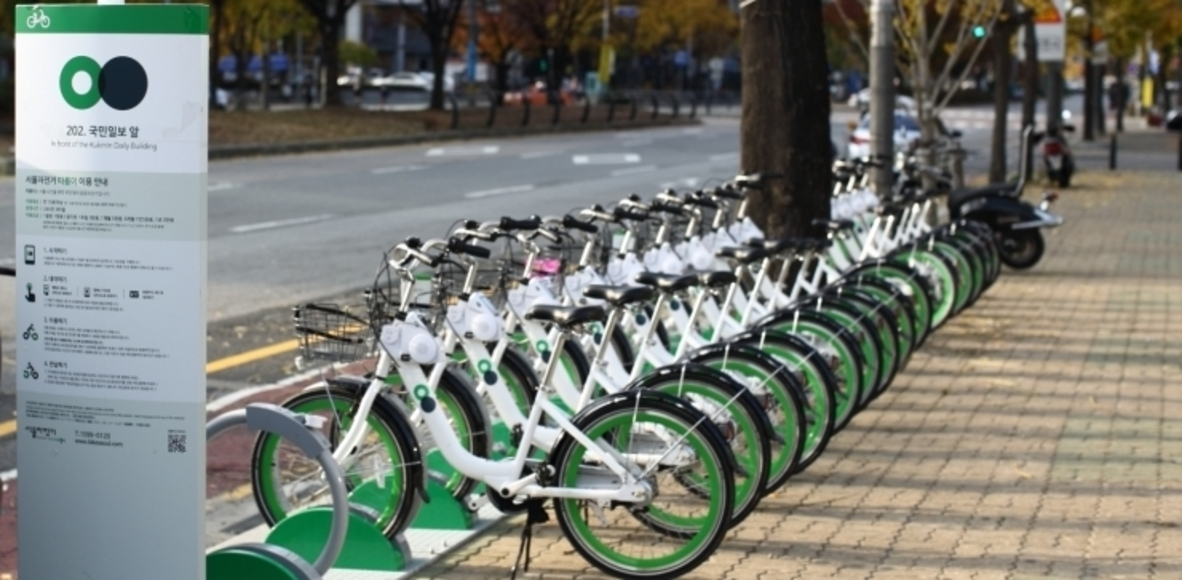/h1>
<h2><center>Bike Rental Prediction</center></h2>


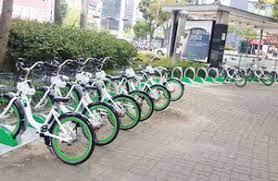


<font color = "Black"><font size = 6>Data Science Project: Analyzing Bike Sharing Data</font>

# Predicting Daily Bike Rentals with Environmental Insights

<font color = "Turquoise"><font size = 6>Problem Statement</font>

This problem statement aims to predict the demand for bike rentals based on different features available in the dataset. It involves regression modeling to predict a continuous target variable (cnt) representing the total count of bike rentals. The features include both temporal factors (such as season, month, hour, and weekday) and weather-related variables (temperature, humidity, windspeed, weather situation), as well as binary indicators for holidays and working days. Additionally, the dataset provides counts of casual and registered users, which can also influence the overall bike rental demand

Predicting Bike Rental Demand: Using historical bike rental data, develop a machine learning model to predict the total count of bike rentals (cnt) based on various factors such as weather conditions (season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed), as well as additional factors such as the number of casual and registered users (casual, registered)




<font color = "Turquoise"><font size = 6>Overview of Bike Sharing Dataset Columns</font>

* instant: Index/identifier for each record.

* dteday: Date of observation.

* season: Season of the year.

* yr: Year of observation.

* mnth: Month of observation.

* hr: Hour of observation.

* holiday: Indicates if it's a holiday (binary).

* weekday: Day of the week (0 to 6).

* workingday: Indicates if it's a working day (binary).

* weathersit: Weather situation (categorical).

* temp: Temperature at observation time.

* atemp: "Feels-like" temperature.

* hum: Humidity at observation time.

* windspeed: Wind speed at observation time.

* casual: Number of casual bike rentals.

* registered: Number of registered bike rentals.

* cnt: Total bike rentals (casual + registered).

<font color = "Red"><font size = 5>Import Libraries</font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


<font color = "Red" size = 5>Lets check the number of rows and columns</font>

In [6]:
df.shape

(17379, 17)

<font color = "Red" size = 5>Checking columns</font>

In [7]:
pd.DataFrame(df.columns,columns=['Columns Name'])

,Columns Name
0,instant
1,dteday
2,season
3,yr
4,mnth
5,hr
6,holiday
7,weekday
8,workingday
9,weathersit


<font color = "Red" size = 5>Lets check the nature of columns</font>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<font color = "Red" size = 5>Satistical Summary</font>

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


<font color = "Red" size = 5>Checking the null value</font>

In [10]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<font color = "Red" size = 5>Checking count of unique value in column</font>

In [11]:
df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
df.dteday.value_counts()

2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, Length: 731, dtype: int64

<font color = "Red" size = 5>Delete irrelevent columns </font>

In [13]:
df = df.drop(['instant','dteday','casual','registered'],axis=1) # instant--->Index , casual , registered----> cnt(casual + registered))
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


<font color = "Red" size = 5>Checking Unique Values</font>

In [14]:
pd.DataFrame(df.apply(lambda x : x.unique()))

,0
season,"[1, 2, 3, 4]"
yr,"[0, 1]"
mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
hr,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
holiday,"[0, 1]"
weekday,"[6, 0, 1, 2, 3, 4, 5]"
workingday,"[0, 1]"
weathersit,"[1, 2, 3, 4]"
temp,"[0.24, 0.22, 0.2, 0.32, 0.38, 0.36, 0.42, 0.46..."
atemp,"[0.2879, 0.2727, 0.2576, 0.3485, 0.3939, 0.333..."


<font color = "Red" size = 5>Checking column type and missing values</font>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


<font color = "Red" size = 5>Convert Categorical Columns Data type as Object</font>

In [16]:
col_to_convert = ['season','hr','yr','mnth','holiday','weekday','workingday','weathersit']

for columns in col_to_convert:
  df[columns] = df[columns].astype('object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  object 
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  object 
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 1.7+ MB


<font color = "Turquoise"><font size = 6>Exploratory Data Analysis</font>

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(8,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

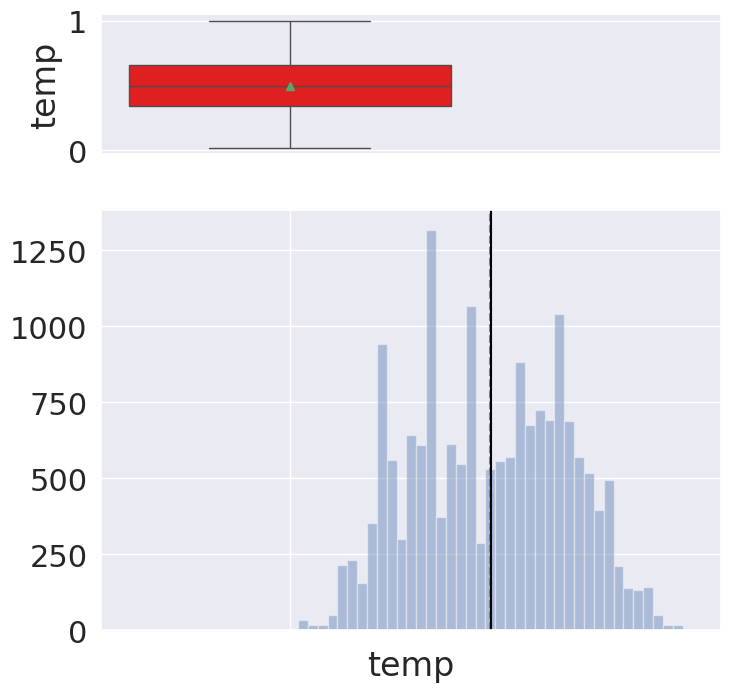

In [19]:
histogram_boxplot(df.temp)

<font color = "Turquoise"><font size =5 >Boxplot</font>

* The horizontal line in the middle of the box represents the median average temperature, which is about 67 degrees Fahrenheit.
* The box itself represents the middle 50% of the temperatures, from the 25th percentile (about 62 degrees Fahrenheit) to the 75th percentile (about 72 degrees Fahrenheit).
* The whiskers extend to the highest and lowest temperatures that are not considered outliers. Any temperatures beyond the whiskers are considered outliers.

<font color = "Turquoise"><font size =5 >Histogram</font>


* The x-axis shows the temperature in degrees Fahrenheit, and the y-axis shows the number of days that the average temperature was within that range.

* For example, there were about 20 days when the average temperature was between 65 and 70 degrees Fahrenheit.

<Axes: xlabel='temp', ylabel='Density'>

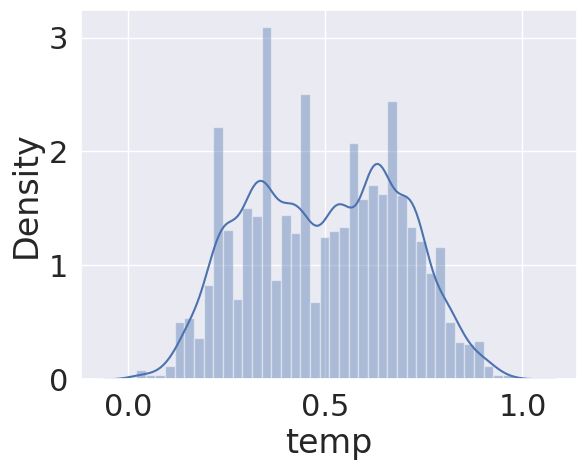

In [20]:
sns.distplot(df.temp)

* The distplot shows the distribution of two variables, which appear to be average temperature and density. The x-axis shows the values for each variable, and the y-axis shows the density of data points at each value.

* The temperature data appears to be normally distributed, with a bell-shaped curve

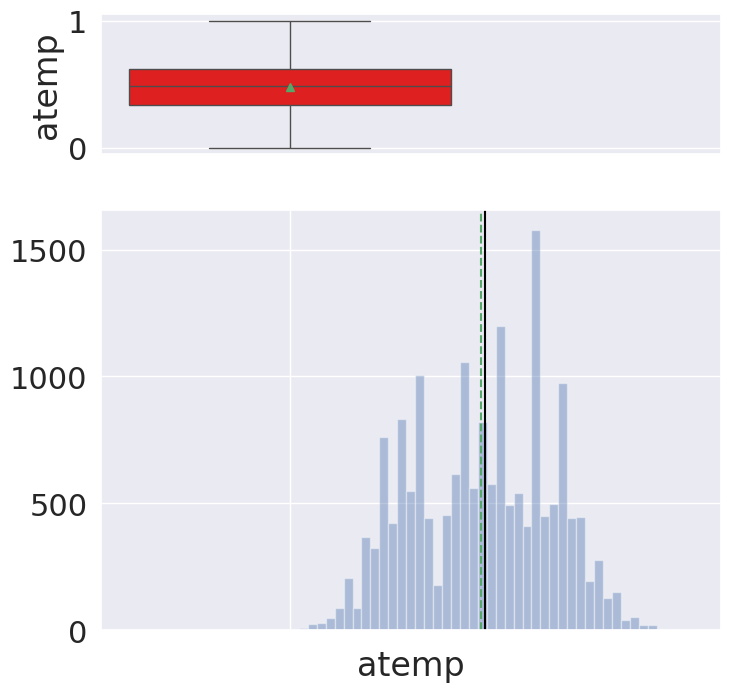

In [21]:
histogram_boxplot(df.atemp)

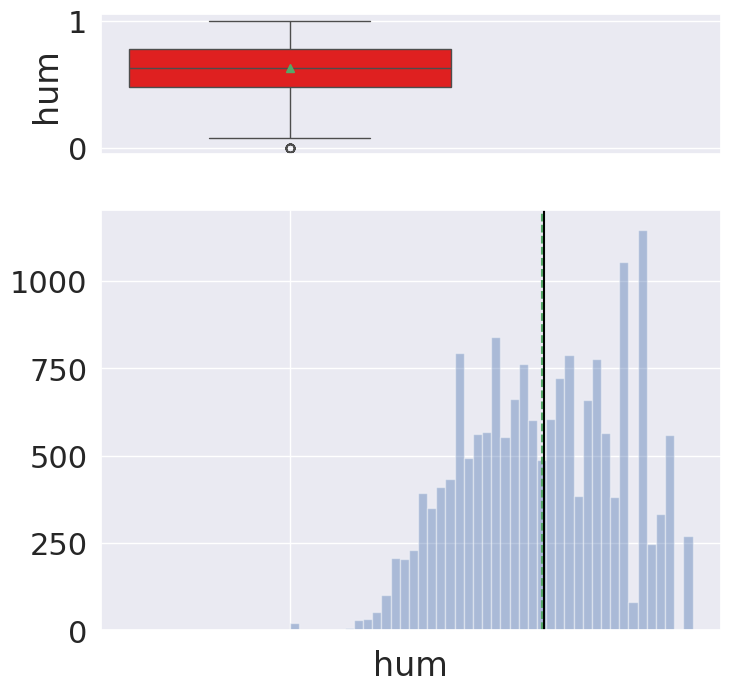

In [22]:
histogram_boxplot(df.hum)

<Axes: xlabel='hum', ylabel='Density'>

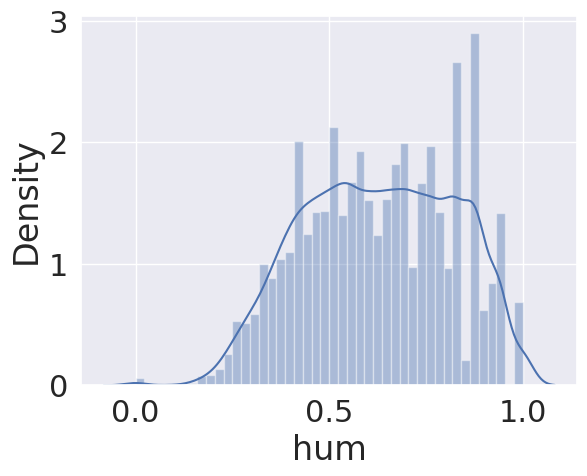

In [23]:
sns.distplot(df.hum)

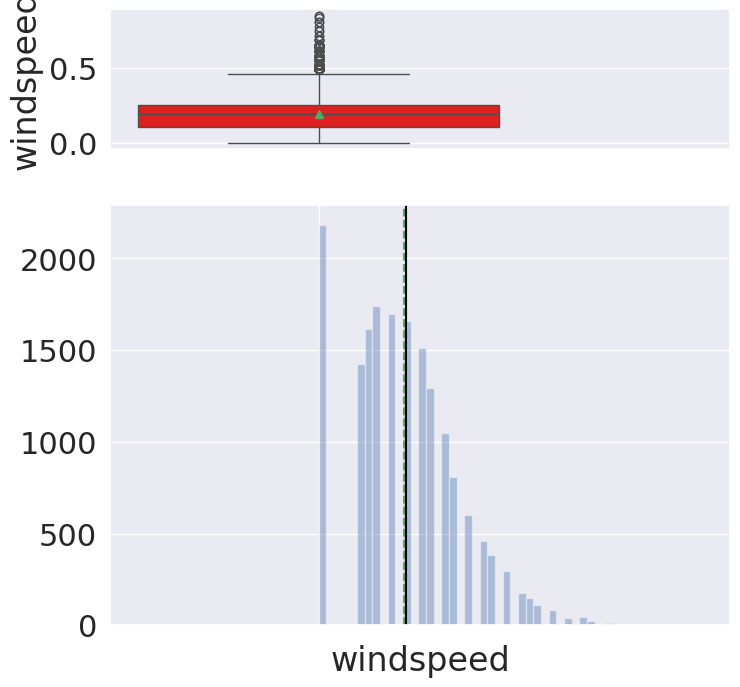

In [24]:
histogram_boxplot(df.windspeed)

<Axes: xlabel='windspeed', ylabel='Density'>

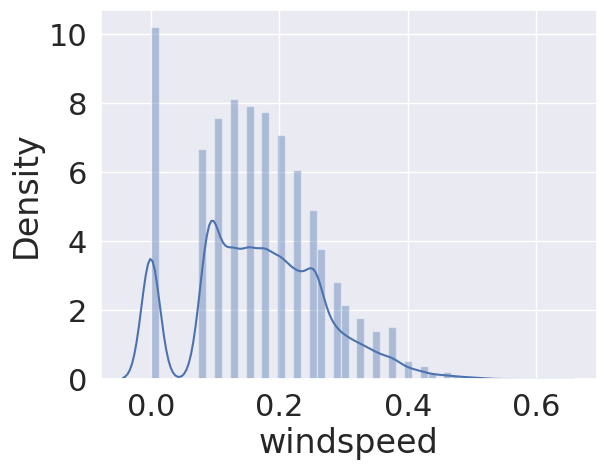

In [25]:
df['windspeed'] = np.log1p(df.windspeed)
sns.distplot(df.windspeed)

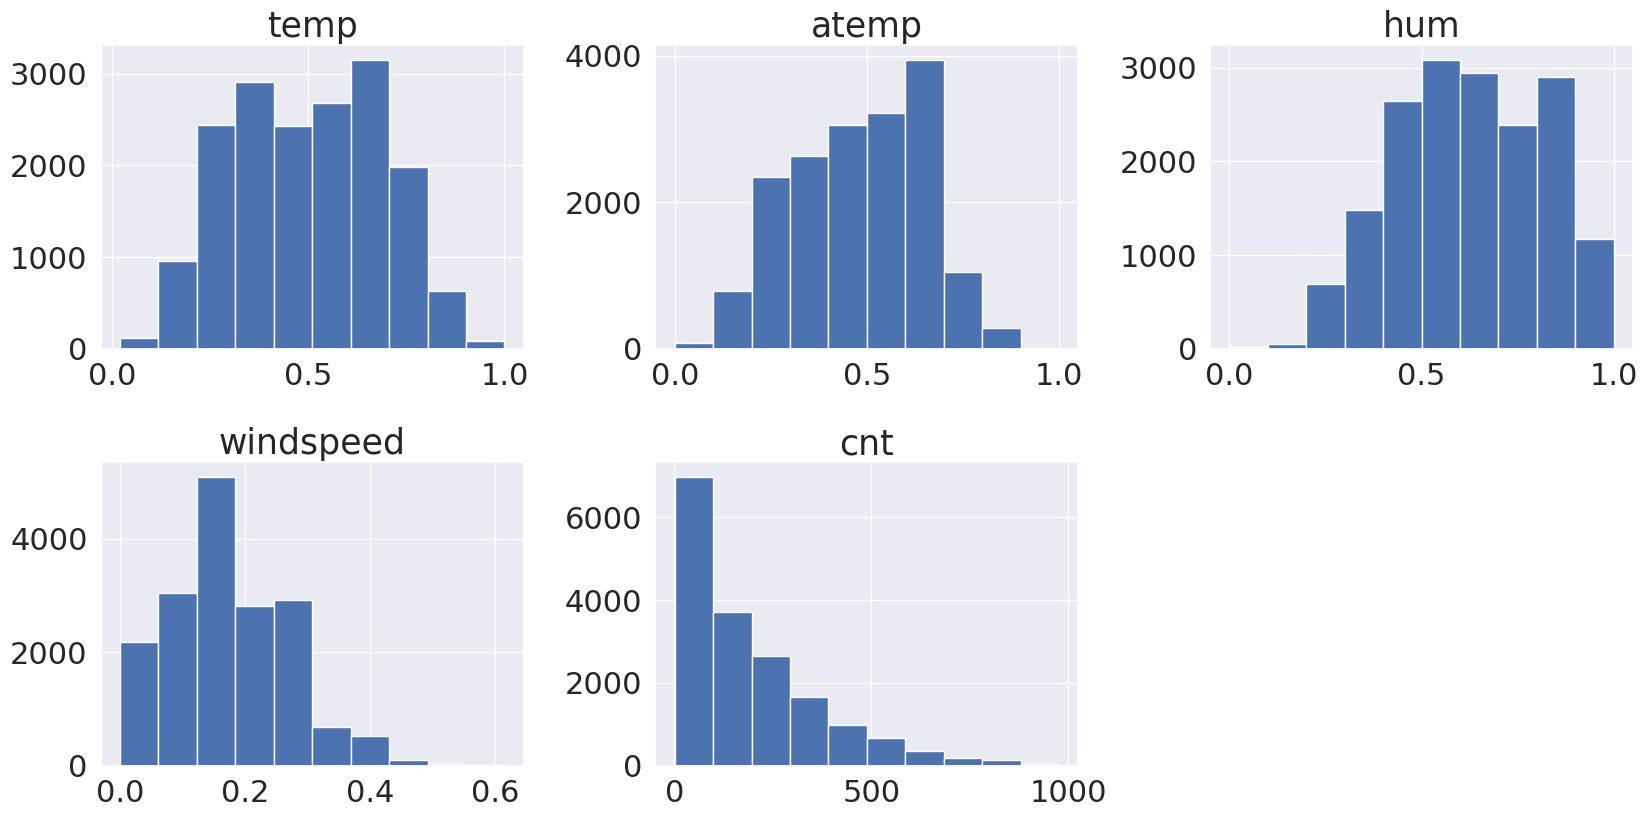

In [26]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

### The histogram plot shows the distribution of Five variables: Temperature, atemp, humidity, windspeed and cnt.

<font color = "Turquoise"><font size =5 >Temperature</font>

* The temperature data appears to be normally distributed, with a bell-shaped curve centered around 2000 degrees. This means that most of the time, the temperature was around 2000 degrees.There are fewer data points at higher and lower temperatures.

<font color = "Turquoise"><font size =5 >Humidity</font>


* The humidity data is more difficult to interpret, as it has two peaks. One peak is around 0.5, and the other peak is around 1.0. This could mean that there were two distinct groups of humidity data, or that the humidity data is not normally distributed.

<font color = "Turquoise"><font size =5 >Windspeed</font>


* The windspeed data is also somewhat normally distributed, with a peak around 4500. However, it is skewed to the right, meaning that there are more data points at higher wind speeds than lower wind speeds.



<font color = "Red" size = 5>Handling Independent variable</font>

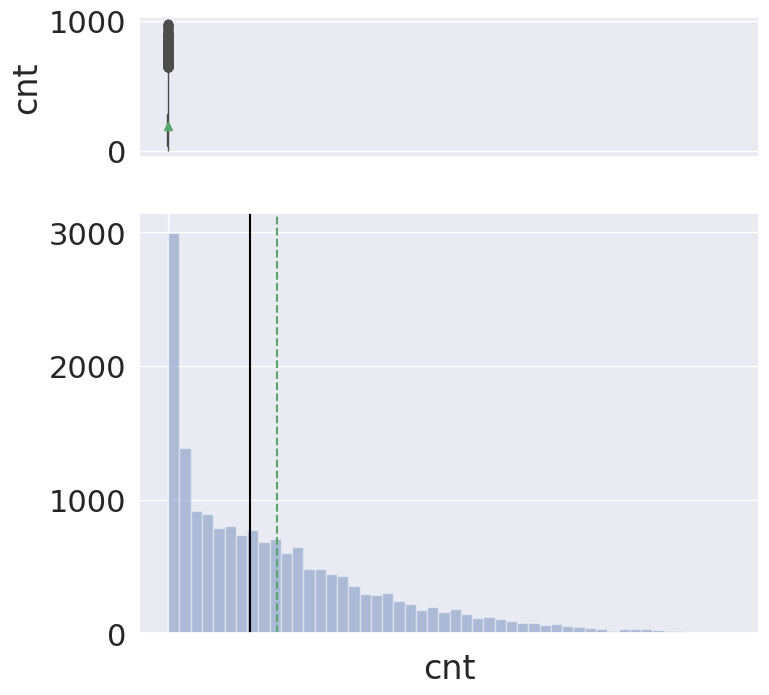

In [27]:
histogram_boxplot(df.cnt)

<Axes: xlabel='cnt', ylabel='Density'>

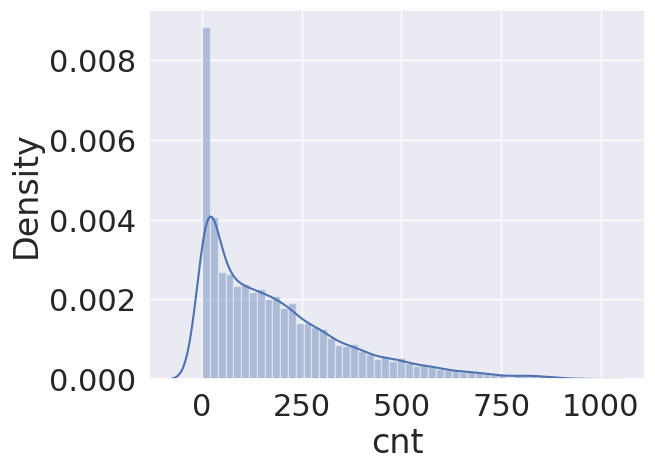

In [28]:
sns.distplot(df.cnt)

In [29]:
df['cnt'] = np.sqrt(df.cnt)

In [30]:
# df['cnt'] = np.log1p(df.cnt)
# sns.boxplot(df.cnt)
# sns.distplot((df.cnt))

<Axes: xlabel='cnt', ylabel='Density'>

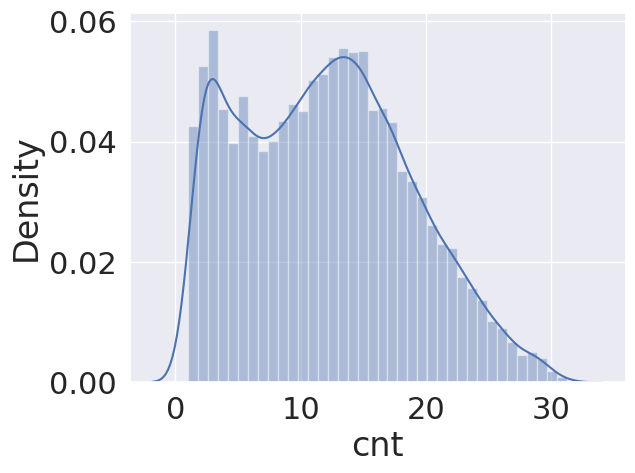

In [31]:
sns.distplot((df.cnt))

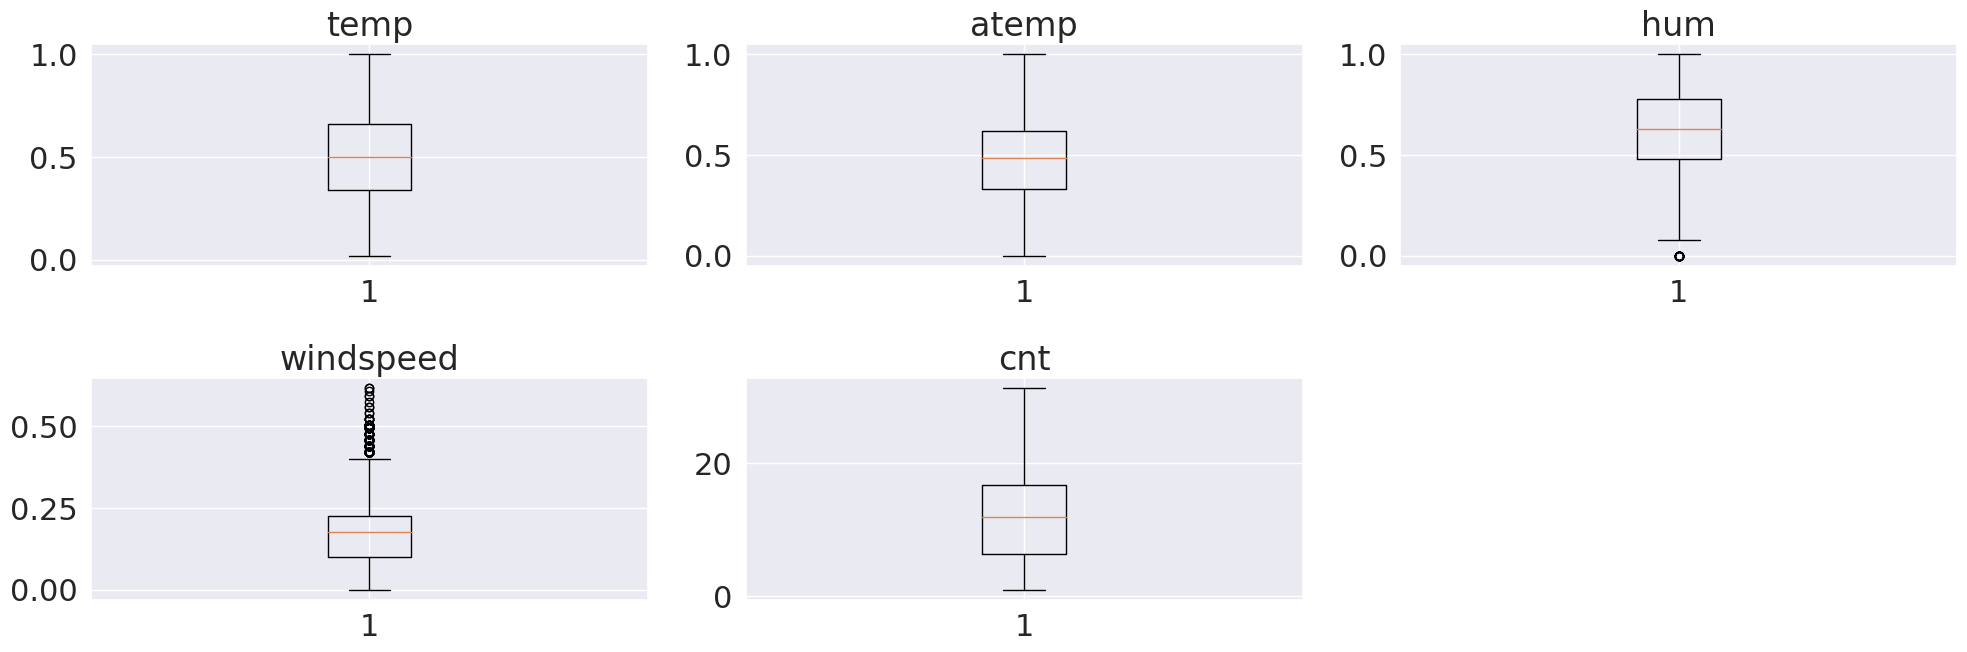

In [32]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,3,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

### The Boxplot shows the distribution of Five variables: Temperature, atemp, humidity, windspeed and cnt.

* The windspeed data is more spread out than the temperature data, as indicated by the wider box. This means there is a larger range of windspeed values compared to temperature values.

* There are no outliers for either windspeed.

<Axes: ylabel='windspeed'>

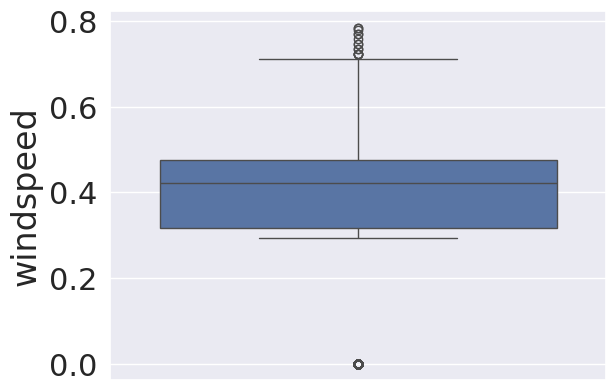

In [33]:
sns.boxplot(np.sqrt(df.windspeed))

In [34]:
df.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.018471,0.420774
atemp,0.987672,1.000000,-0.051918,-0.057971,0.417228
hum,-0.069881,-0.051918,1.000000,-0.287430,-0.352159
windspeed,-0.018471,-0.057971,-0.287430,1.000000,0.112906
cnt,0.420774,0.417228,-0.352159,0.112906,1.000000


<Axes: >

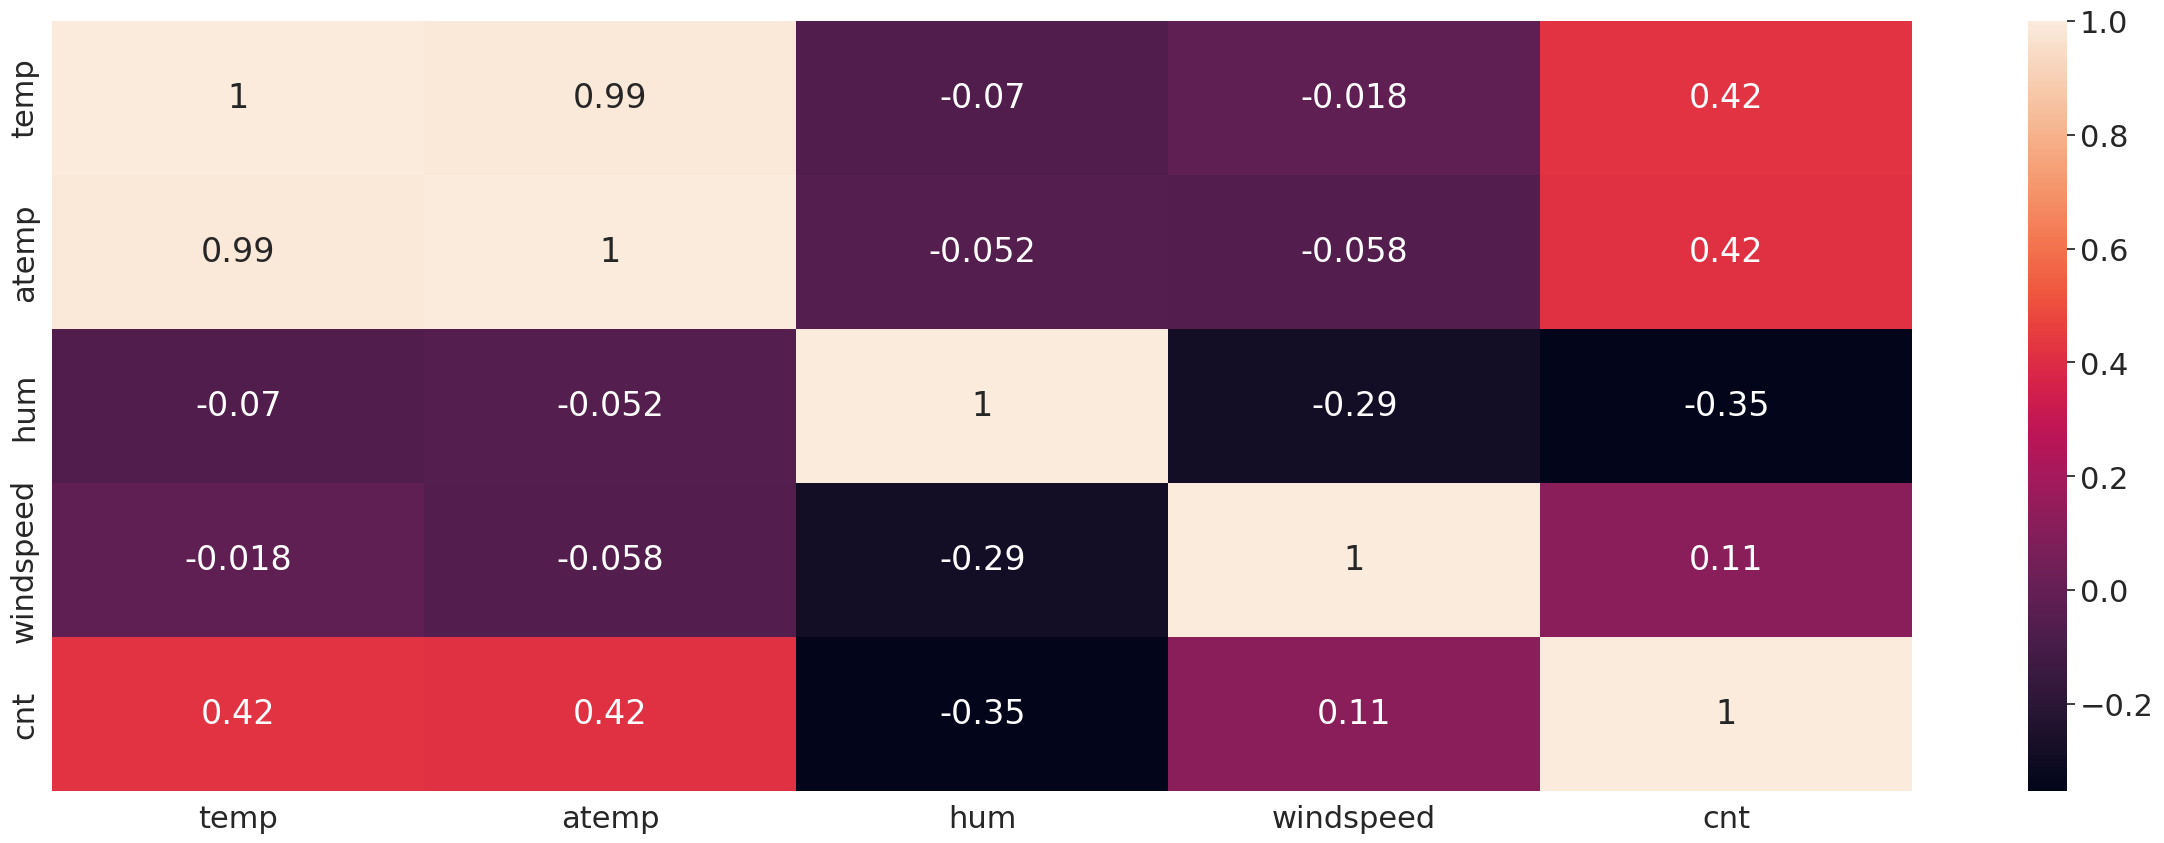

In [35]:
plt.figure(figsize=[30,10])
sns.heatmap(df.corr(),annot = True)

<font color = "Red" size = 5>Defining Dependent and Independent variable/target variable</font>

In [36]:
x = df.drop('cnt',axis=1)
y = df[['cnt']]

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  object 
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  object 
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
dtypes: float64(4), object(8)
memory usage: 1.6+ MB


In [38]:
# copy x variable for pipeline
X = x.copy()

<font color = "Red" size = 5>Creating Dummies column for  object columns</font>

###Categorical value cannot be read so we have to convert them in the numeric form so the algorithm can process the data properly



In [39]:
x = pd.get_dummies(x,columns=col_to_convert,drop_first=True)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [41]:
x_train.head()

,temp,atemp,hum,windspeed,season_2,season_3,season_4,hr_1,hr_2,hr_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
10371,0.46,0.4545,0.82,0.177309,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
15456,0.36,0.3485,0.50,0.152034,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16437,0.48,0.4697,0.29,0.000000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3908,0.64,0.5758,0.83,0.202042,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
14135,0.64,0.2424,0.73,0.152034,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [42]:
# Check the shape of train and test data
print(x_train.shape)
print(x_test.shape)

(12165, 53)
(5214, 53)


## **Model Building**

In [43]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()

In [44]:
linearregression.fit(x_train,y_train)

LinearRegression()

In [45]:
print("Intercept of the linear equation:", linearregression.intercept_)
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(x_train)

Intercept of the linear equation: [1.59043568]

Coefficients of the equation are: [[ 3.66393042e+00  4.96399430e+00 -2.47732263e+00 -1.35917481e+00
   1.60923355e+00  1.72142588e+00  2.95438749e+00 -1.26261794e+00
  -2.36175515e+00 -3.60468484e+00 -4.05578600e+00 -2.11110478e+00
   1.75978647e+00  7.00721331e+00  1.11307681e+01  7.52980900e+00
   5.64548312e+00  6.40404553e+00  7.83520652e+00  7.57203539e+00
   6.85966949e+00  7.35662865e+00  9.23652087e+00  1.29296784e+01
   1.23194976e+01  9.62233434e+00  7.29151372e+00  5.54516368e+00
   4.17452626e+00  2.26768075e+00  2.80760723e+00  2.56039187e-01
   5.44688325e-01  1.24950245e-01  8.20697891e-01  2.07078578e-01
  -6.19442043e-01  5.29633929e-03  7.05073896e-01  4.86146071e-02
  -5.37970808e-01 -4.15231565e-01 -1.04231584e+10  1.04231584e+10
   1.04231584e+10  1.04231584e+10  1.04231584e+10  1.04231584e+10
   4.99853376e-01 -1.04231584e+10 -3.16911562e-01 -2.63454193e+00
  -3.87283937e+00]]


<font color = "Red" size = 5>Model performances </font>

In [46]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [47]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(linearregression, x_train, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.101709,2.420504,0.784363,0.78342,NaN


In [48]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
test_perf = model_performance_regression(linearregression, x_test, y_test)
test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.128506,2.436294,0.788019,0.785842,NaN





*   R^2 (coefficient of determination) regression score function.
*   Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


*   R^2 value is 0.78 which means that in this model independent variables are able to explain 78% of variances in dependent variable






<font color = "Turquoise"><font size =5 >Conclusion</font>

The Training and testing scores are around 78% and both scores are comparable.

R2_score is 0.78, that explains 78% of total variation in the dataset. So, overall the model is not good enough.

## Go for Regulaization techinique

In [49]:
# Lets try Ridge
from sklearn.linear_model import  Ridge

In [50]:
# Ridge
rdg = Ridge()
rdg.fit(x_train, y_train)
Y_predict_train = rdg.predict(x_train)
Y_predict_test = rdg.predict(x_test)
print("R2 Score training Ridge :", r2_score(y_train, Y_predict_train))
print("R2 Score testing Ridge :", r2_score(y_test, Y_predict_test))

R2 Score training Ridge : 0.7843055081354509
R2 Score testing Ridge : 0.7882484023307234


<font color = "Blue"><font size =5 >Observation</font>

# After doing Regularization Ridge is showing good result

<font color = "Red"><font size =5 >Linear Regression using Stats Model</font>

Here is the complete syntax to perform the linear regression in Python using statsmodels. Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [57]:
import statsmodels.api as sm

In [58]:
# Lets us build linear regression model using statsmodel

x = sm.add_constant(x)
x_train1, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

olsmod0 = sm.OLS(y_train, x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     847.2
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:33:16   Log-Likelihood:                -31032.
No. Observations:               12165   AIC:                         6.217e+04
Df Residuals:                   12112   BIC:                         6.256e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5904      0.241      6.592   

<font color = "blue" size = 4>Observation </font>

P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
Negative values of coefficient shows that, Life expectancy deceases with their increase.
Positive values of coefficient shows that, Life expectancy inceases with their increase.
But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values

<font color = "blue" size = 4>Interpreting the Regression Results </font>



1   Adjusted. R-squared: It reflects the fit of the model.



*   R-squared values range from 0 to 1, where a higher value generally
   indicates a better fit, assuming certain conditions are met.
* In our case, the value for Adj. R-squared is 0.55, which is okay!



2   Const coefficient is the Y-intercept.

*   It means that if all the dependent variables (features: like age, fuel, year of driving experiance and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.






3   Std err: It reflects the level of accuracy of the coefficients.



*   The lower it is, the higher is the level of accuracy.



4    P >|t|: It is p-value
*   Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis

    Ho : Independent feature is not significant

    Ha : Independent feature is that it is significant



*   Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level

*   A p-value of less than 0.05 is considered to be statistically significant.








<font color = "red" size = 5>Test of Multicolinearity </font>

*   Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.
*   There are different ways of detecting(or testing) multi-collinearity, one such way is Variation Inflation Factor.
*   Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βkis “inflated”by the existence of correlation among the predictor variables in the model.
*   General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.




In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)
print('Series before Feature Selection \n\n{}\n'.format(vif_series1))

Series before Feature Selection 

const           74.538574
temp            54.258238
atemp           46.527077
hum              1.925499
windspeed        1.246737
season_2         7.496176
season_3        10.643274
season_4         7.370460
hr_1             1.914002
hr_2             1.904422
hr_3             1.885449
hr_4             1.889265
hr_5             1.916077
hr_6             1.926273
hr_7             1.923744
hr_8             1.919257
hr_9             1.923061
hr_10            1.939133
hr_11            1.968237
hr_12            2.004604
hr_13            2.035229
hr_14            2.058387
hr_15            2.066299
hr_16            2.060387
hr_17            2.036329
hr_18            2.004357
hr_19            1.967074
hr_20            1.945474
hr_21            1.929578
hr_22            1.922167
hr_23            1.919189
yr_1             1.025370
mnth_2           1.836897
mnth_3           2.529120
mnth_4           5.459583
mnth_5           6.452884
mnth_6           6.622499
mnth

In [60]:
x_train2 = x_train1.drop('holiday_1',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train2,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print('Series before Feature Selection \n\n{}\n'.format(vif_series2))

Series before Feature Selection 

const           73.280804
temp            54.748078
atemp           46.683594
hum              1.933964
windspeed        1.240925
season_2         7.673242
season_3        10.664779
season_4         7.577860
hr_1             1.859929
hr_2             1.851154
hr_3             1.833462
hr_4             1.836182
hr_5             1.861890
hr_6             1.914638
hr_7             1.853530
hr_8             1.858740
hr_9             1.914609
hr_10            1.915944
hr_11            1.907305
hr_12            1.980297
hr_13            2.015684
hr_14            2.045069
hr_15            2.021668
hr_16            2.013241
hr_17            1.990485
hr_18            1.891021
hr_19            1.921294
hr_20            1.887578
hr_21            1.874005
hr_22            1.860858
hr_23            1.850720
yr_1             1.024461
mnth_2           1.826239
mnth_3           2.483147
mnth_4           5.519995
mnth_5           6.456321
mnth_6           6.869689
mnth

In [61]:
x_train3 = x_train2.drop('temp',axis=1)
vif_series3 = pd.Series([variance_inflation_factor(x_train3,i) for i in range(x_train3.shape[1])],index=x_train3.columns)
print('Series before Feature Selection \n\n{}\n'.format(vif_series3))

Series before Feature Selection 

const           73.068985
atemp            4.781433
hum              1.928896
windspeed        1.170461
season_2         7.672327
season_3        10.649532
season_4         7.576611
hr_1             1.859874
hr_2             1.851139
hr_3             1.833109
hr_4             1.835642
hr_5             1.861299
hr_6             1.913442
hr_7             1.852584
hr_8             1.858344
hr_9             1.914543
hr_10            1.915144
hr_11            1.905555
hr_12            1.977924
hr_13            2.011592
hr_14            2.039855
hr_15            2.012936
hr_16            2.006582
hr_17            1.985848
hr_18            1.887155
hr_19            1.920174
hr_20            1.887441
hr_21            1.874004
hr_22            1.860841
hr_23            1.850718
yr_1             1.022172
mnth_2           1.825474
mnth_3           2.461002
mnth_4           5.475036
mnth_5           6.247644
mnth_6           6.495011
mnth_7           8.339637
mnth

In [62]:
x_train4 = x_train3.drop('season_3',axis=1)
vif_series4 = pd.Series([variance_inflation_factor(x_train4,i) for i in range(x_train4.shape[1])],index=x_train4.columns)
print('Series before Feature Selection \n\n{}\n'.format(vif_series4))

Series before Feature Selection 

const           72.921976
atemp            4.736561
hum              1.927998
windspeed        1.170288
season_2         5.054697
season_4         5.280963
hr_1             1.859800
hr_2             1.851054
hr_3             1.833086
hr_4             1.835638
hr_5             1.861286
hr_6             1.913402
hr_7             1.852570
hr_8             1.858344
hr_9             1.914542
hr_10            1.915120
hr_11            1.905530
hr_12            1.977631
hr_13            2.011450
hr_14            2.039669
hr_15            2.012602
hr_16            2.006315
hr_17            1.985741
hr_18            1.886717
hr_19            1.920117
hr_20            1.887308
hr_21            1.873825
hr_22            1.860740
hr_23            1.850640
yr_1             1.022153
mnth_2           1.825013
mnth_3           2.362415
mnth_4           4.571859
mnth_5           5.412753
mnth_6           4.937814
mnth_7           4.593671
mnth_8           3.933444
mnth

In [63]:
x_train5 = x_train4.drop('workingday_1',axis=1)
vif_series5 = pd.Series([variance_inflation_factor(x_train5,i) for i in range(x_train5.shape[1])],index=x_train5.columns)
print('Series before Feature Selection \n\n{}\n'.format(vif_series5))

Series before Feature Selection 

const           72.913684
atemp            4.733053
hum              1.927702
windspeed        1.170286
season_2         5.054697
season_4         5.251142
hr_1             1.859729
hr_2             1.851053
hr_3             1.832987
hr_4             1.835527
hr_5             1.861214
hr_6             1.913379
hr_7             1.852414
hr_8             1.858332
hr_9             1.914542
hr_10            1.915110
hr_11            1.905528
hr_12            1.977617
hr_13            2.011446
hr_14            2.039656
hr_15            2.012454
hr_16            2.006295
hr_17            1.985714
hr_18            1.886609
hr_19            1.920077
hr_20            1.887300
hr_21            1.873819
hr_22            1.860740
hr_23            1.850639
yr_1             1.022147
mnth_2           1.824212
mnth_3           2.354198
mnth_4           4.569419
mnth_5           5.410156
mnth_6           4.923859
mnth_7           4.588758
mnth_8           3.918429
mnth

In [64]:
x_train6 = x_train5.drop('mnth_5',axis=1)
vif_series6 = pd.Series([variance_inflation_factor(x_train6,i) for i in range(x_train6.shape[1])],index=x_train6.columns)
print('Series before Feature Selection \n\n{}\n'.format(vif_series6))

Series before Feature Selection 

const           72.898793
atemp            3.418558
hum              1.924799
windspeed        1.169682
season_2         2.953049
season_4         5.250088
hr_1             1.859653
hr_2             1.850729
hr_3             1.832092
hr_4             1.834270
hr_5             1.859984
hr_6             1.911549
hr_7             1.851184
hr_8             1.858233
hr_9             1.914373
hr_10            1.913996
hr_11            1.902828
hr_12            1.971341
hr_13            2.002512
hr_14            2.029328
hr_15            2.001826
hr_16            1.996846
hr_17            1.978136
hr_18            1.880839
hr_19            1.916217
hr_20            1.884725
hr_21            1.872857
hr_22            1.860304
hr_23            1.850626
yr_1             1.019924
mnth_2           1.584159
mnth_3           1.394648
mnth_4           1.643823
mnth_6           1.823716
mnth_7           2.958530
mnth_8           2.567791
mnth_9           2.358806
mnth

In [65]:
x_train7 = x_train6.drop('season_4',axis=1)
vif_series7 = pd.Series([variance_inflation_factor(x_train7,i) for i in range(x_train7.shape[1])],index=x_train7.columns)
print('Series before Feature Selection \n\n{}\n'.format(vif_series7))

Series before Feature Selection 

const           72.896349
atemp            3.417367
hum              1.924640
windspeed        1.165754
season_2         2.952634
hr_1             1.859639
hr_2             1.850585
hr_3             1.832067
hr_4             1.834222
hr_5             1.859885
hr_6             1.911517
hr_7             1.851084
hr_8             1.858122
hr_9             1.914373
hr_10            1.913995
hr_11            1.902701
hr_12            1.971331
hr_13            2.002489
hr_14            2.029291
hr_15            2.001814
hr_16            1.996829
hr_17            1.978063
hr_18            1.880837
hr_19            1.916216
hr_20            1.884610
hr_21            1.872851
hr_22            1.860196
hr_23            1.850623
yr_1             1.019919
mnth_2           1.584153
mnth_3           1.394624
mnth_4           1.643718
mnth_6           1.823588
mnth_7           2.957786
mnth_8           2.567240
mnth_9           2.206508
mnth_10          1.842365
mnth

<font color = "Red" size = 5>Significance Test</font>

###Since all the VIF values are below 5. Lets us now try check for the R2 and Adjusted R2.
###Also check for p value of predictor variables to check their significance.
###We also drop coloums one by one whoes p value is greater than 0.05

In [66]:
olsmod1 = sm.OLS(y_train,x_train7)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     902.7
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:33:46   Log-Likelihood:                -31213.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12117   BIC:                         6.288e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4394      0.244      5.895   

In [67]:
x_train8 = x_train7.drop('weekday_1',axis=1)
olsmod2 = sm.OLS(y_train,x_train8)
olsres = olsmod2.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     922.4
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:33:46   Log-Likelihood:                -31213.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12118   BIC:                         6.287e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4166      0.239      5.930   

In [68]:
x_train9 = x_train8.drop('mnth_6',axis=1)
olsmod3 = sm.OLS(y_train,x_train9)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     942.8
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:33:46   Log-Likelihood:                -31214.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12119   BIC:                         6.286e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4213      0.239      5.950   

In [69]:
x_train10 = x_train9.drop('mnth_7',axis=1)
olsmod4 = sm.OLS(y_train,x_train10)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     964.2
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:06   Log-Likelihood:                -31214.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12120   BIC:                         6.285e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4092      0.238      5.909   

In [70]:
x_train11 = x_train10.drop('mnth_3',axis=1)
olsmod4 = sm.OLS(y_train,x_train11)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     986.6
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:13   Log-Likelihood:                -31214.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12121   BIC:                         6.284e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4528      0.233      6.247   

In [71]:
x_train12 = x_train11.drop('weekday_2',axis=1)
olsmod5 = sm.OLS(y_train,x_train12)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1010.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:16   Log-Likelihood:                -31216.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12122   BIC:                         6.284e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5016      0.231      6.500   

In [72]:
x_train13 = x_train12.drop('weathersit_4',axis=1)
olsmod6 = sm.OLS(y_train,x_train13)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1034.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:17   Log-Likelihood:                -31218.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12123   BIC:                         6.283e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5037      0.231      6.509   

In [73]:
x_train13 = x_train13.drop('mnth_2',axis=1)
olsmod6 = sm.OLS(y_train,x_train13)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:17   Log-Likelihood:                -31219.
No. Observations:               12165   AIC:                         6.252e+04
Df Residuals:                   12124   BIC:                         6.282e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4065      0.224      6.291   

<font size = 3>Observation</font>

Now no feature has p value greater than 0.05, so we'll consider features in X_train13 as the final ones and olsres6 as Stats final model.

*   Now Adjusted R-squared is 0.777, Our model is able to explain 77% of variance.
*   The Adjusted-R squared in Olsres0 it was 77% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.


<font color = "Red" size = 5>Checking the Linear Regression Assumptions </font>

* Linearity of variables
* Normality of error terms
* Homoscedasticity
* Independence of errors from predictor variables

In [74]:
residual= olsres6.resid
np.mean(residual)

-6.575075689643607e-15

Mean residual is colose to zero

<font color = "blue" size = 4>Test for Linearity</font>


**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [75]:
residual=olsres6.resid
fitted=olsres6.fittedvalues #predicted values

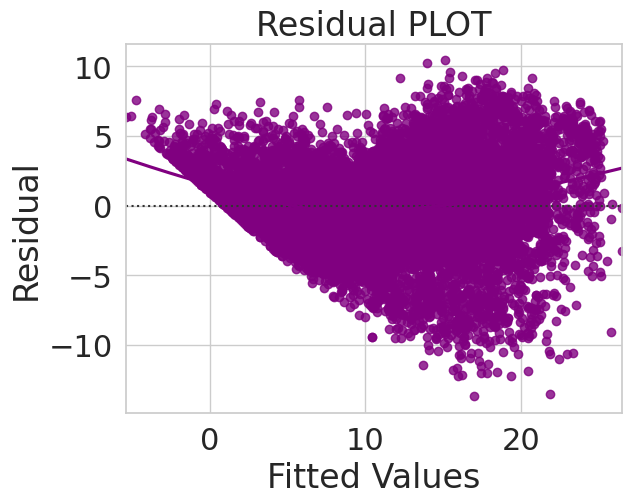

In [76]:
sns.set_style("whitegrid")
sns.residplot(x=fitted,y=residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.


<br/>
<font color = "blue" size = 4>Test for  Normality</font>

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

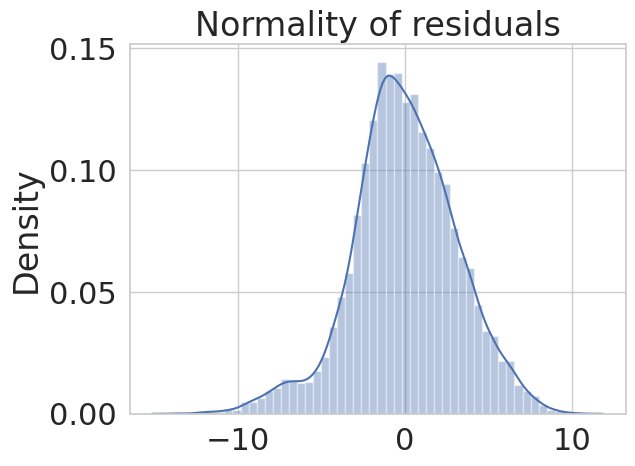

In [77]:
# Test for normality
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line

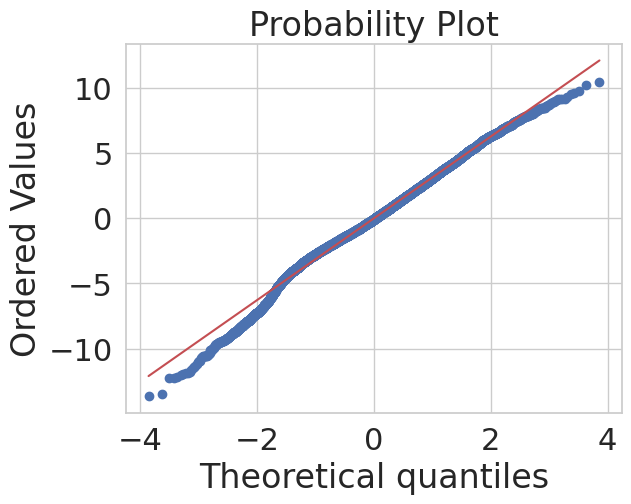

In [78]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [79]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9925784468650818, pvalue=1.4095594438075422e-24)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

<font color = "blue" size = 4>Test of Homoscedasticity</font>

* Test - goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [80]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train13)
lzip(name, test)

[('F statistic', 1.0296168421309233), ('p-value', 0.12834819403536002)]

<font size = 3>Observation</font>

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part

In [81]:
# Selecting those columns which is used to create  our model
x_test_final = x_test[x_train13.columns]

In [82]:
x_test_final.head()

,const,atemp,hum,windspeed,season_2,hr_1,hr_2,hr_3,hr_4,hr_5,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
3230,1.0,0.5455,0.78,0.099393,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
15161,1.0,0.5455,0.53,0.202042,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3812,1.0,0.6667,0.74,0.152034,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1543,1.0,0.3030,0.76,0.283975,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14019,1.0,0.6212,0.54,0.202042,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
y_pred = olsres6.predict(x_test_final)

In [84]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(olsres6, x_train13, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.149877,2.444659,0.777614,0.776862,NaN


In [85]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres6, x_test_final, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.169227,2.459412,0.782465,0.780741,NaN


### Observation: Performing well on both training and testing data

In [86]:
# Drop constant variable which we recently addded during statsmodel
x_test = x_test[x_train.columns]

In [87]:
# # Taking those Columns which is present in traing data
# x_test = x_test[x_train13.columns]

<font color = "Red"><font size = 6>Decision Tree Base Model</font>

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error

In [83]:
model = DecisionTreeRegressor(random_state=1)

In [84]:
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [85]:
# checking model performance on train set (seen 70% data)
dt_train_pred = model.predict(x_train)
dt_test_pred = model.predict(x_test)

In [86]:
# dt_train_pred

In [87]:
print(r2_score(y_train,dt_train_pred))
print(r2_score(y_test,dt_test_pred))

0.9999975254793622
0.8397152901831904


In [103]:
x_test.shape

(5214, 53)

In [53]:
def get_r2_score(model):
    '''
    model: classifier to predict values of X

    '''
    n = 12165
    k = 53
    x = 5214
    pred_train = model.predict(x_train)  # Predict on training set
    pred_test = model.predict(x_test)  # Predict on test set
    r2_train =  metrics.r2_score(y_train, pred_train)
    r2_test = metrics.r2_score(y_test, pred_test)

    train_adjusted_r2 = 1 - (1 - r2_train) * ((n - 1) / (n - k - 1))
    test_adjusted_r2 = 1 - (1 - r2_test) * ((x - 1) / (x - k - 1))

    # Calculate and print accuracy scores
    print("R2 on training set: ", metrics.r2_score(y_train, pred_train))
    print("R2 on test set: ", metrics.r2_score(y_test, pred_test))
    print("Adj_R2 on train set: ", train_adjusted_r2)
    print("Adj_R2 on test set: ", test_adjusted_r2)

    print("MSE on training set: ", metrics.mean_squared_error(y_train, pred_train))
    print("MSE on test set: ", metrics.mean_squared_error(y_test, pred_test))
    print("RMSE on training set: ",np.sqrt(metrics.mean_absolute_error(y_train, pred_train)))
    print("RMSE on test set: ", np.sqrt(metrics.mean_absolute_error(y_test, pred_test)))
    print("MAE on training set: ", metrics.mean_absolute_error(y_train, pred_train))
    print("MAE on test set: ", metrics.mean_absolute_error(y_test, pred_test))






<font color = "Red"><font size = 6>Visualize The Tree</font>

In [ ]:
feature_names = x.columns

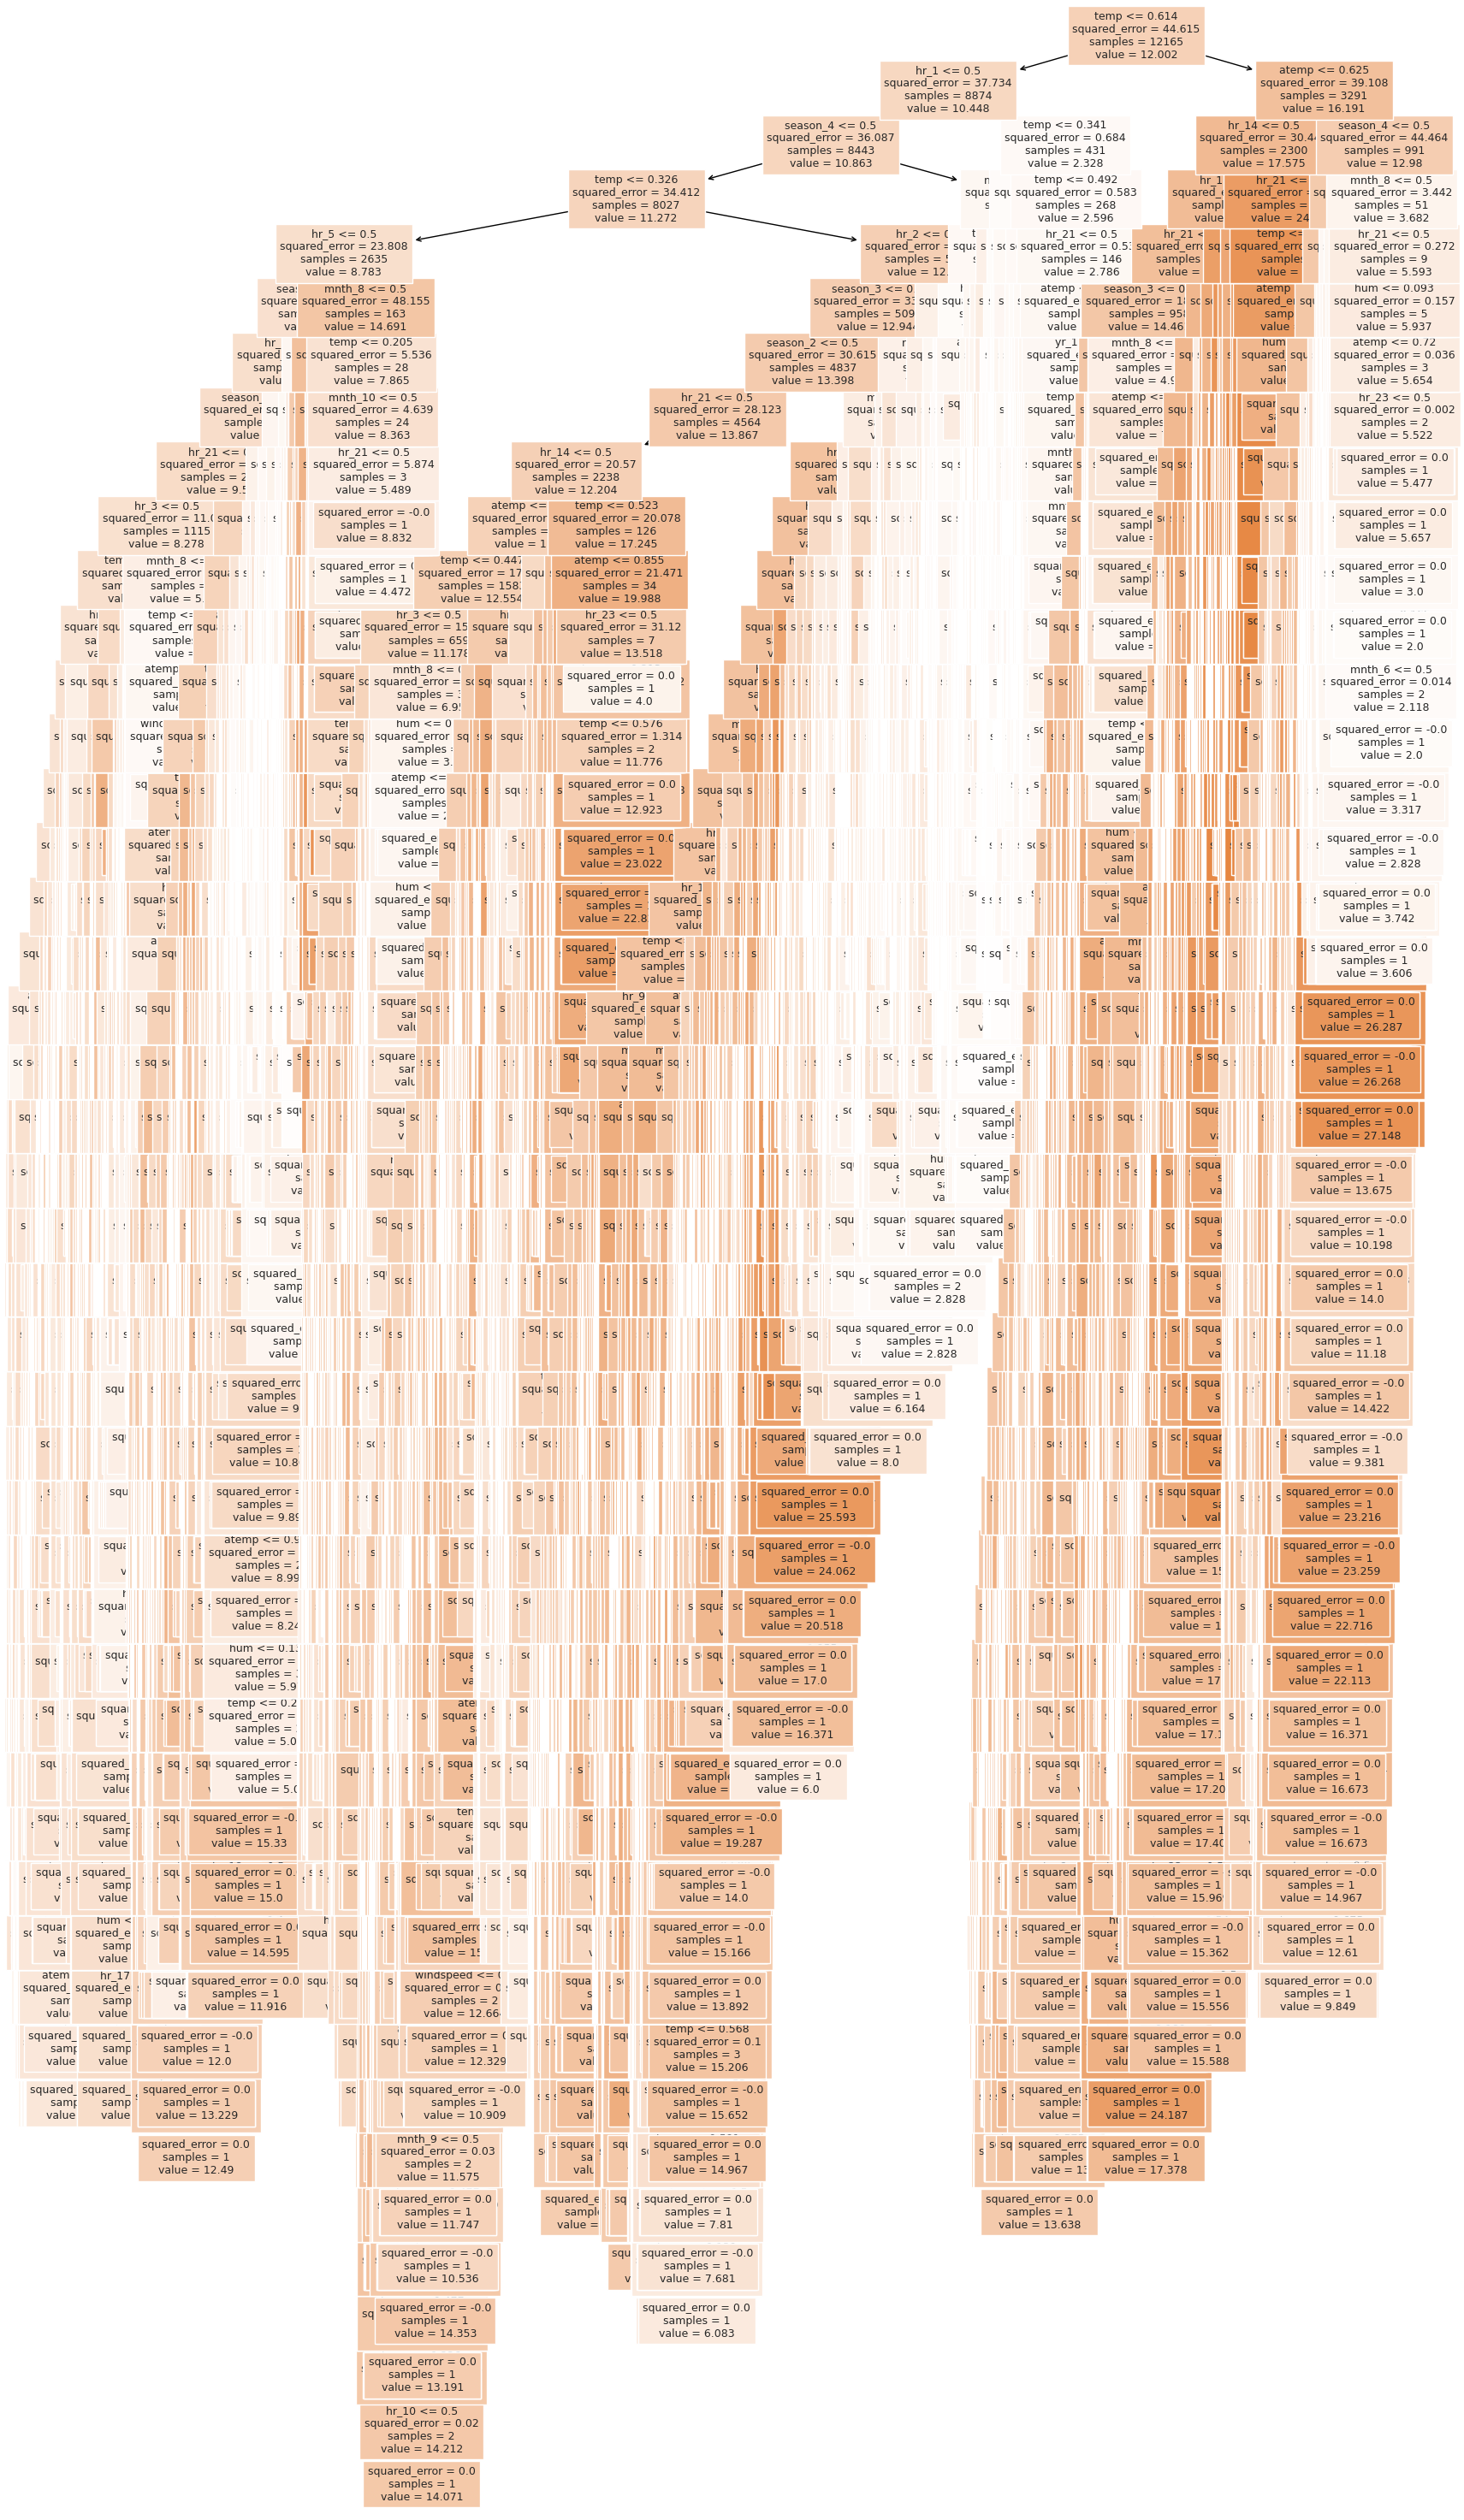

In [ ]:
# Visualize the tree
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


<font color = "Red"><font size = 6>Pre-Pruning</font>

###Using pre-pruning method for hyper parameter tunning using grid search for better result

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [90]:
# Choose the type of Regressor.
estimator = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2','sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=9, max_features='sqrt',
                      min_impurity_decrease=0.0001, random_state=1)

In [105]:
# Checking Performance of model
get_r2_score(estimator)

R2 on training set:  0.49400693310850685
R2 on test set:  0.48795080481820385
Adj_R2 on train set:  0.49179261285871334
Adj_R2 on test set:  0.4826913847901738
MSE on training set:  22.574785974180887
MSE on test set:  23.642275963912834
RMSE on training set:  1.8923951835936097
RMSE on test set:  1.9195538597493444
MAE on training set:  3.581159530888292
MAE on test set:  3.6846870204786057


### Observation: Model is looking underfiiting

<font color = "Red"><font size = 6> Bagging Regressor</font>


In [106]:
from sklearn.ensemble import BaggingRegressor

In [107]:
bagging = BaggingRegressor(random_state=1)
bagging.fit(x_train,y_train)

BaggingRegressor(random_state=1)

In [108]:
get_r2_score(bagging)

R2 on training set:  0.9807399159014372
R2 on test set:  0.9064095409551838
Adj_R2 on train set:  0.98065563017299
Adj_R2 on test set:  0.9054482436045297
MSE on training set:  0.8592850472060315
MSE on test set:  4.321247804209987
RMSE on training set:  0.7759945514733975
RMSE on test set:  1.1993603857777664
MAE on training set:  0.6021675439163994
MAE on test set:  1.4384653349729923


In [109]:
bagging_wt = BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='squared_error',random_state=1),random_state=1)
bagging_wt.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                 random_state=1)

In [110]:
# Checking performance of model
get_r2_score(bagging_wt)

R2 on training set:  0.9807399159014372
R2 on test set:  0.9064095409551838
Adj_R2 on train set:  0.98065563017299
Adj_R2 on test set:  0.9054482436045297
MSE on training set:  0.8592850472060315
MSE on test set:  4.321247804209987
RMSE on training set:  0.7759945514733975
RMSE on test set:  1.1993603857777664
MAE on training set:  0.6021675439163994
MAE on test set:  1.4384653349729923


### Observation: Model Perform well on training data but not on testing data

<font color = "Red"><font size = 6>HyperParameter Tunning for Bagging Regresssor</font>



In [111]:
from sklearn.model_selection import RandomizedSearchCV
# Create a base regressor (Decision Tree with class weights)
reg1 = DecisionTreeRegressor(criterion='squared_error', random_state=1)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'base_estimator': [reg1],
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Create the BaggingRegressor with default parameters (you can customize them if needed)
bagging_regressor = BaggingRegressor(random_state=1, bootstrap=True)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(bagging_regressor, param_distributions=param_dist, n_iter=10, scoring='r2', cv=5, random_state=1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=BaggingRegressor(random_state=1),
                   param_distributions={'base_estimator': [DecisionTreeRegressor(random_state=1)],
                                        'max_features': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': [5, 7, 15, 51, 101]},
                   random_state=1, scoring='r2')

In [112]:
# Checking Performance of model
get_r2_score(random_search)

R2 on training set:  0.9856082576773295
R2 on test set:  0.9068223512031888
Adj_R2 on train set:  0.9855452767225692
Adj_R2 on test set:  0.9058652939577951
MSE on training set:  0.6420848900673123
MSE on test set:  4.302187577388222
RMSE on training set:  0.7630838750042263
RMSE on test set:  1.2332436249436562
MAE on training set:  0.5822970002914656
MAE on test set:  1.5208898384641696


<font color = "Red"><font size = 6> Random Forest</font>




In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf = RandomForestRegressor(random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [115]:
# Checking Perfromance of model
get_r2_score(rf)

R2 on training set:  0.9876935853413902
R2 on test set:  0.9189958318186973
Adj_R2 on train set:  0.9876397301703138
Adj_R2 on test set:  0.9181638122617963
MSE on training set:  0.5490483866396833
MSE on test set:  3.7401150443945674
RMSE on training set:  0.7159543874361054
RMSE on test set:  1.160092106625299
MAE on training set:  0.5125906848890089
MAE on test set:  1.3458136958543239


<font color = "Red"><font size = 6>Hyper Parameter Tunning For Random Forest</font>




In [116]:
# Choose the type of regressor.
rf_regressor = RandomForestRegressor(random_state=1)

# Randomized grid of parameters to choose from
random_parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": [1, 6, 1],
    "max_features": [0.7, 0.9, 'log2', 'sqrt'],
    "max_samples": [0.7, 0.9, None],
}

# Run the randomized search
random_search_regressor = RandomizedSearchCV(rf_regressor, random_parameters, n_iter=10, scoring='r2', cv=5, random_state=1)
random_search_regressor = random_search_regressor.fit(x_train, y_train)

In [117]:
get_r2_score(random_search_regressor)

R2 on training set:  0.9834968083549815
R2 on test set:  0.8872073932865471
Adj_R2 on train set:  0.9834245873032776
Adj_R2 on test set:  0.8860488645741802
MSE on training set:  0.7362868063903192
MSE on test set:  5.2078471359803125
RMSE on training set:  0.7979651793917556
RMSE on test set:  1.3065257102305783
MAE on training set:  0.6367484275217167
MAE on test set:  1.707009431493517


## Its Seens that our model is performing well on Training data but not on testing data  ie. Overfitting

# **Boosting Model**

<font color = "Red"><font size = 6> AdaBoost Regressor</font>




In [118]:
from sklearn.ensemble import AdaBoostRegressor

In [119]:
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(x_train,y_train)

AdaBoostRegressor(random_state=1)

In [120]:
get_r2_score(ab_regressor)

R2 on training set:  0.45612869500011244
R2 on test set:  0.45516920190075905
Adj_R2 on train set:  0.4537486124994937
Adj_R2 on test set:  0.4495730716102049
MSE on training set:  24.264716477832305
MSE on test set:  25.155864326137436
RMSE on training set:  2.0216399108664795
RMSE on test set:  2.039950499719023
MAE on training set:  4.087027929208227
MAE on test set:  4.161398041303893


### It look like underfittng. Lets checking best hyper parameter for our model



<font color = "Red"><font size = 6>Hyperparameter tunning for AdaBoost</font>








In [121]:
# Choosse the type of regressor
ab_regressor = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators' : np.arange(10,100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(ab_regressor, parameters, scoring=scorer, cv=5, n_iter=10, random_state=1)
randomized_search_obj = randomized_search_obj.fit(x_train,y_train)

# Set the regressor to the best combination of parameters
ab_regressor_tuned_randomized = randomized_search_obj.best_estimator_

In [122]:
# Checking the Performance of model
get_r2_score(ab_regressor_tuned_randomized)

R2 on training set:  0.4577786184611421
R2 on test set:  0.4569167615707407
Adj_R2 on train set:  0.45540575633402136
Adj_R2 on test set:  0.4513385810209828
MSE on training set:  24.19110545142962
MSE on test set:  25.075176204039245
RMSE on training set:  2.0172442534609067
RMSE on test set:  2.0380430684783017
MAE on training set:  4.06927437812105
MAE on test set:  4.153619548972452


## We observed that our model is look like underfitting.
Lets check for other models.




<font color = "Red"><font size = 6>Gradiant Boosting Regressor</font>








In [123]:
from sklearn.ensemble import GradientBoostingRegressor

In [124]:
gb_estimmator = GradientBoostingRegressor(random_state=1)
gb_estimmator.fit(x_train,y_train)

GradientBoostingRegressor(random_state=1)

In [125]:
get_r2_score(gb_estimmator)

R2 on training set:  0.8397574441042488
R2 on test set:  0.8437199546159744
Adj_R2 on train set:  0.839056192724307
Adj_R2 on test set:  0.842114752599433
MSE on training set:  7.149191639177218
MSE on test set:  7.215744103084002
RMSE on training set:  1.4259011783117719
RMSE on test set:  1.431997783553568
MAE on training set:  2.0331941703108996
MAE on test set:  2.050617652102331


### Here we see that our model is performing well

<font color = "Red"><font size = 6>Lets check Hyper Parameter Tunning for GradientBoost Regressor</font>








In [126]:
# Choose the type of regressor.
gb_regressor_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 200, 25),
              'subsample': [0.7, 0.8, 0.9, 1],
              'max_features': [0.7, 0.8, 0.9, 1],
              'max_depth': [3, 5, 7, 10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(gb_regressor_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=1)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the regressor to the best combination of parameters
gb_regressor_tuned_randomized = randomized_search_obj.best_estimator_

In [127]:
# Lets, Check the Perofrmance of model
get_r2_score(gb_regressor_tuned_randomized)

R2 on training set:  0.9621277378802837
R2 on test set:  0.9326481788612575
Adj_R2 on train set:  0.961962001781502
Adj_R2 on test set:  0.9319563868999488
MSE on training set:  1.689663886035049
MSE on test set:  3.109760462505768
RMSE on training set:  0.9443836492957356
RMSE on test set:  1.1161969919435197
MAE on training set:  0.8918604770571309
MAE on test set:  1.245895724823762


<font color = "Red"><font size = 6>XGBoost Regressor</font>








In [128]:
from xgboost import XGBRegressor

In [129]:
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [130]:
get_r2_score(xgb_estimator)

R2 on training set:  0.9629284968030389
R2 on test set:  0.9353040004995827
Adj_R2 on train set:  0.9627662649749951
Adj_R2 on test set:  0.9346394873264195
MSE on training set:  1.6539381765719385
MSE on test set:  2.9871361743025115
RMSE on training set:  0.9426771685385762
RMSE on test set:  1.100744820224206
MAE on training set:  0.8886402440839072
MAE on test set:  1.2116391592504199


### Here we see that our model perform good on training data bus not on testing data, it means our model is overfitting model.
# Then we go for HyperParameter tunning for XGBoost Regressor

<font color = "Red"><font size = 6> Hyper Parameter Tunning for XGBoost Regressor</font>








In [131]:
# Choose the type of regressor.
xgb_regressor = XGBRegressor(random_state=1)

# Randomized grid of parameters to choose from
param_dist = {
    'n_estimators': [50,130, 200,500],
    'learning_rate': [0.001, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'gamma': [1,2,3,4,5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the randomized search
random_search_obj = RandomizedSearchCV(xgb_regressor, param_distributions=param_dist, n_iter=10, scoring=scorer, cv=5, random_state=1)
random_search_obj.fit(x_train, y_train)

# Set the regressor to the best combination of parameters
xgb_regressor_tuned = random_search_obj.best_estimator_

In [132]:
# Check the performance of XGBoost using HyperParameter tunning
get_r2_score(xgb_regressor_tuned)

R2 on training set:  0.9577479652768854
R2 on test set:  0.9399488752516001
Adj_R2 on train set:  0.9575630624744476
Adj_R2 on test set:  0.9393320710632929
MSE on training set:  1.8850666209869509
MSE on test set:  2.7726735567682392
RMSE on training set:  0.9869682588581187
RMSE on test set:  1.08720720382869
MAE on training set:  0.9741063439934264
MAE on test set:  1.1820195040569987


In [133]:
# Print the best parameters and their corresponding score+
print("Best Parameters:", random_search_obj.best_params_)
print("Best R2_Score:", random_search_obj.best_score_)

# Now you can use xgb_tuned_randomized for predictions or other tasks

Best Parameters: {'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 4, 'colsample_bytree': 1}
Best R2_Score: 0.9309737831445904


In [134]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.000000,4.000000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.000000,6.324555
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.000000,5.656854
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.000000,3.605551
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.152034,10.908712
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.152034,9.433981
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.152034,9.486833
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.126016,7.810250


In [103]:
# Define the data
data = {
    'Algorithm': [
        "Pre-Pruning",
        "Bagging Regressor",
        "Bagging Regresssor Tunning",
        "Random Forest",
        "Random Forest Tunning",
        "AdaBoost Regressor",
        "AdaBoost Tunning",
        "Gradiant Boosting Regressor",
        "GradientBoost Regressor Tunning",
        "XGBoost Regressor",
        "XGBoost Regressor Tunning"
    ],
    'Train R2': [
        0.4940, 0.9807, 0.9856, 0.9877, 0.9835, 0.4561, 0.4578, 0.8398, 0.9621, 0.9629, 0.9577
    ],
    'Test R2': [
        0.4879, 0.9064, 0.9068, 0.9190, 0.8872, 0.4552, 0.4569, 0.8437, 0.9326, 0.9353, 0.9399
    ],
    'Train Adj_R2': [
        0.4918, 0.9807, 0.9855, 0.9876, 0.9834, 0.4537, 0.4554, 0.8391, 0.9620, 0.9628, 0.9576
    ],
    'Test Adj_R2': [
        0.4827, 0.9054, 0.9059, 0.9182, 0.8860, 0.4496, 0.4513, 0.8421, 0.9320, 0.9346, 0.9393
    ],
    'Train MSE': [
        22.5748, 0.8593, 0.6421, 0.5490, 0.7363, 24.2647, 24.1911, 7.1492, 1.6897, 1.6539, 1.8851
    ],
    'Test MSE': [
        23.6423, 4.3212, 4.3022, 3.7401, 5.2078, 25.1559, 25.0752, 7.2157, 3.1098, 2.9871, 2.7727
    ],
    'Train RMSE': [
        1.8924, 0.7760, 0.7631, 0.7160, 0.7980, 2.0216, 2.0172, 1.4259, 0.9444, 0.9427, 0.9870
    ],
    'Test RMSE': [
        1.9196, 1.1994, 1.2332, 1.1601, 1.3065, 2.0399, 2.0380, 1.4320, 1.1162, 1.1007, 1.0872
    ],
    'Train MAE': [
        3.5812, 0.6022, 0.5823, 0.5126, 0.6367, 4.0870, 4.0693, 2.0332, 0.8919, 0.8886, 0.9741
    ],
    'Test MAE': [
        3.6847, 1.4385, 1.5209, 1.3458, 1.7070, 4.1614, 4.1536, 2.0506, 1.2459, 1.2116, 1.1820
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df


,Algorithm,Train R2,Test R2,Train Adj_R2,Test Adj_R2,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Pre-Pruning,0.4940,0.4879,0.4918,0.4827,22.5748,23.6423,1.8924,1.9196,3.5812,3.6847
1,Bagging Regressor,0.9807,0.9064,0.9807,0.9054,0.8593,4.3212,0.7760,1.1994,0.6022,1.4385
2,Bagging Regresssor Tunning,0.9856,0.9068,0.9855,0.9059,0.6421,4.3022,0.7631,1.2332,0.5823,1.5209
3,Random Forest,0.9877,0.9190,0.9876,0.9182,0.5490,3.7401,0.7160,1.1601,0.5126,1.3458
4,Random Forest Tunning,0.9835,0.8872,0.9834,0.8860,0.7363,5.2078,0.7980,1.3065,0.6367,1.7070
5,AdaBoost Regressor,0.4561,0.4552,0.4537,0.4496,24.2647,25.1559,2.0216,2.0399,4.0870,4.1614
6,AdaBoost Tunning,0.4578,0.4569,0.4554,0.4513,24.1911,25.0752,2.0172,2.0380,4.0693,4.1536
7,Gradiant Boosting Regressor,0.8398,0.8437,0.8391,0.8421,7.1492,7.2157,1.4259,1.4320,2.0332,2.0506
8,GradientBoost Regressor Tunning,0.9621,0.9326,0.9620,0.9320,1.6897,3.1098,0.9444,1.1162,0.8919,1.2459
9,XGBoost Regressor,0.9629,0.9353,0.9628,0.9346,1.6539,2.9871,0.9427,1.1007,0.8886,1.2116





<font color = "Red"><font size = 6>Conclusion</font>









* Now Model is ready to deploy on production environment.
* In final model we used **XGBoost Regressor** which gave more accurate result as compare to others model.